## Data Review

Review training data, by simply selecting the task and running the notebook.

### Dependencies

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Custom Functions
import sys
sys.path.append('../src')
import data as dt
import prepare as pr
import helper as he

In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

### Parameter
- Task
- Data type (eg. Training, Test, Clean,..)

In [4]:
task = 1
data_type = 'train'
#Select from: source, prep, clean, train, test
#NOTE: currently only applies to classification tasks
text_key = 'text'

### Run

In [5]:
dt_task = dt.Data(task=task)

In [6]:
data = dt_task.load(f'fn_{data_type}')

In [7]:
data['_text_length'] = data[text_key].astype(str).map(lambda text: len(text))

In [8]:
data.head()

,text,label,_text_length
0,Internet connection problem. I have surface pr...,surface,741
1,Is it possible to detect whether my Laptop con...,protect,284
2,Internet Explorer keeps Shutting down. Interne...,ie,142
3,What is Duilib? It gives me a warning every ti...,protect,683
4,Fortnite. I purchased the 25 PMO V-bucks deal ...,xbox,228


#### Data Integrity

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19330 entries, 0 to 19329
Data columns (total 3 columns):
text            19330 non-null object
label           19330 non-null object
_text_length    19330 non-null int64
dtypes: int64(1), object(2)
memory usage: 453.2+ KB


In [10]:
data.describe()

,_text_length
count,19330.000000
mean,400.846560
std,269.847923
min,21.000000
25%,192.000000
50%,326.000000
75%,549.000000
max,1054.000000


### Labels

           surface      protect        skype          ie  musicandvideo  \
label  6873.000000  4222.000000  2964.000000  1806.00000     1356.00000   
label     0.355561     0.218417     0.153337     0.09343        0.07015   

              edge        xbox  
label  1325.000000  784.000000  
label     0.068546    0.040559  


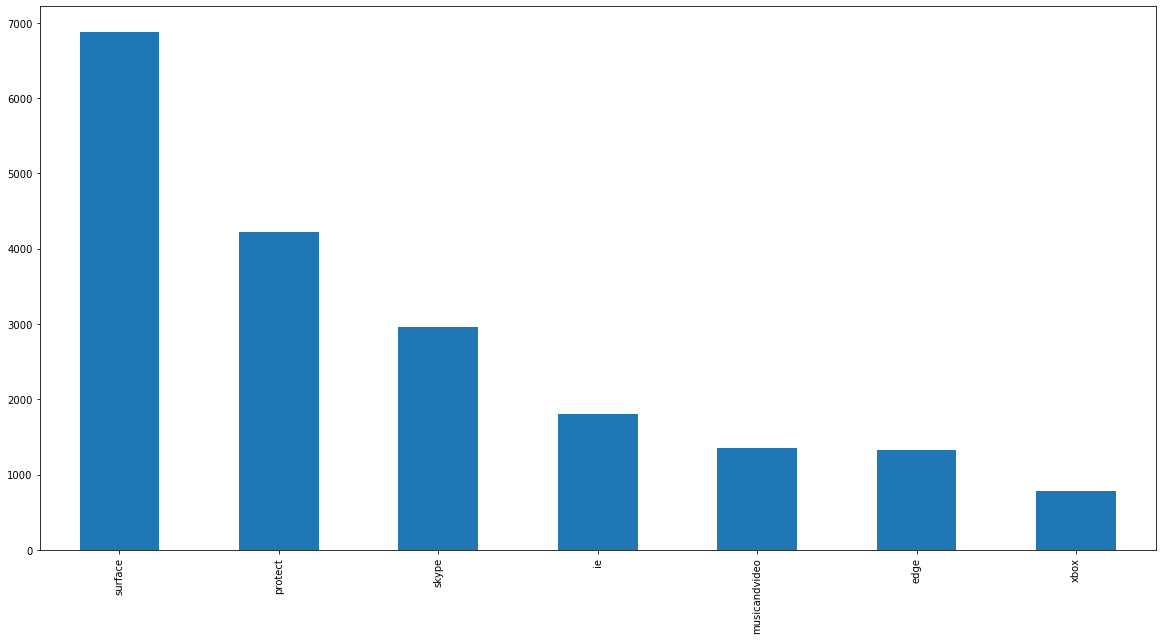

In [11]:
try:
    print(pd.DataFrame([data.label.value_counts(), data.label.value_counts() / len(data)]))
    fig = plt.figure(figsize=(20, 10))
    data.label.value_counts().plot(kind='bar')
except AttributeError:
    print('[INFO] This dataset does not have any labels')

### Text

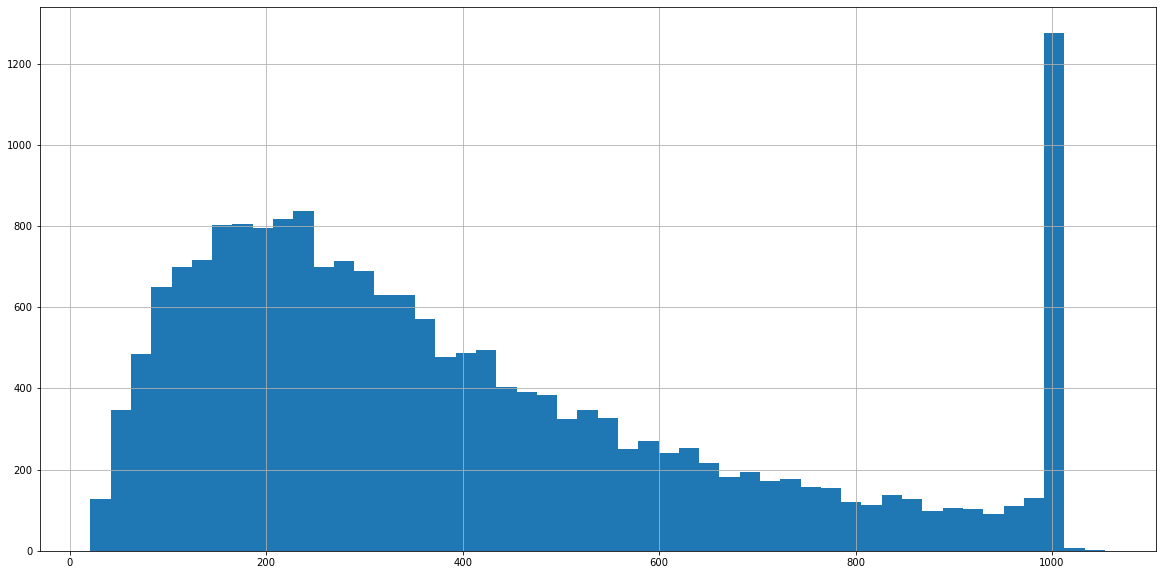

In [12]:
fig = plt.figure(figsize=(20, 10))
data._text_length.hist(bins=50)

<Figure size 1440x1440 with 0 Axes>

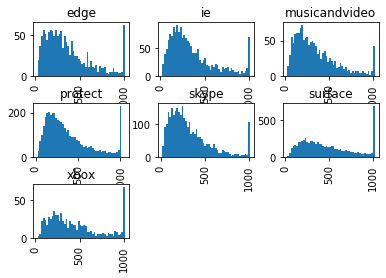

In [13]:
try:
    fig = plt.figure(figsize=(20, 20))
    data.hist(bins=50, column='_text_length', by='label')
except KeyError:
    print('[INFO] This dataset does not have any labels')